# Subject Line Testing

We will evaluate subject-line performance using key performance indicators, including: 

- open rate
- optout rate

To do so, we will calculate the correlation of subject line words and campaign performance to build a library of high-performance words used in subject lines

In [35]:
import pandas as pd #dataframe objects
import nltk #natural langugage toolkit
import seaborn as sns #graphical tool
from functools import reduce
import matplotlib.pyplot as plt

In [36]:
filepath = 'C:/Users/Christine/Documents/SL_Data.xlsx'
sl_data = pd.read_excel(filepath)

In [37]:
sl_data.head()

,campaign_id,subbusiness_unit_nm,event_date_id,subject_line,campaign_desc,sent,bounced,bounce_rate,opened,open_rate,click,click_rate,optout,optout_rate
0,190504706,DISNEY.COM,2019-05-13,Here's wishing YOU more birthday fun!,20190513_CDE_20190510_BUID:047_Disney.comHappy...,13833,139,0.010048,58987,4.264223,2429,0.002941,406,0.000492
1,190303204,DISNEY INTERACTIVE STUDIOS,2019-03-29,NOW AVAILBLE - DuckTales on Plot Twists!,20190329_CDE_20190326_BUID:032_DIS DuckTalesAm...,398,17,0.042714,634,1.592965,4,0.003155,3,0.002366
2,190504705,DISNEY.COM,2019-05-15,All The Disney Films and TV Shows Coming to Di...,20190515_CDE_20190512_BUID:047_Disney.comCIMNa...,314360,433,0.001377,397592,1.264767,28196,0.008865,2140,0.000673
3,_Bb9bI8B9umOCat,DISNEY CHANNEL,2018-11-30,Congratulations! You are a Disney Channel Frea...,20181130_CDE_20181127_BUID:073_DisneyChannelFr...,20,0,0.000000,24,1.200000,12,0.500000,0,0.000000
4,43112,FREEFORM,2019-06-13,TUESDAY: Good Trouble Summer Premiere at 8 on ...,UNK,26,0,0.000000,31,1.192308,31,0.250000,0,0.000000


In [38]:
# Number of rows in data set
len(sl_data)

2355

In [40]:
# Number of unique sub business units
len(sl_data.subbusiness_unit_nm.unique())

29

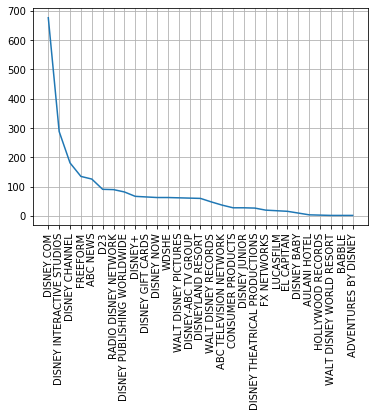

In [42]:
# plot of all LOBs

fig,ax = plt.subplots()
plt.plot(sl_data.subbusiness_unit_nm.unique(), sl_data['subbusiness_unit_nm'].value_counts())
plt.xticks(rotation=90)
plt.grid(True)

plt.show()

In [43]:
print(sl_data['subbusiness_unit_nm'].value_counts())

ABC TELEVISION NETWORK           676
DISNEY.COM                       288
FREEFORM                         181
D23                              135
ABC NEWS                         126
RADIO DISNEY NETWORK              91
WALT DISNEY PICTURES              90
DISNEY PUBLISHING WORLDWIDE       82
DISNEY INTERACTIVE STUDIOS        67
DISNEY CHANNEL                    65
LUCASFILM                         63
WALT DISNEY RECORDS               63
EL CAPITAN                        62
DISNEY-ABC TV GROUP               61
WDSHE                             60
CONSUMER PRODUCTS                 48
DISNEY JUNIOR                     37
FX NETWORKS                       28
DISNEY NOW                        28
DISNEY GIFT CARDS                 27
DISNEY BABY                       20
DISNEYLAND RESORT                 18
AULANI HOTEL                      16
WALT DISNEY WORLD RESORT          10
HOLLYWOOD RECORDS                  4
DISNEY THEATRICAL PRODUCTIONS      3
ADVENTURES BY DISNEY               2
B

In [44]:
# Subset for ABC network

abctvnetwork_ss = sl_data[sl_data.subbusiness_unit_nm == 'ABC TELEVISION NETWORK']

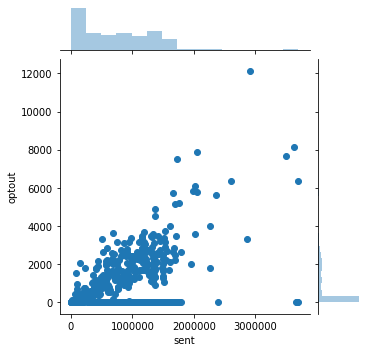

In [45]:
sns.jointplot(x='sent', y='optout', data=abctvnetwork_ss , height = 5)

In [46]:
# download stopwords in nltk package
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Christine\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
stop = stopwords.words('english')

# depending on the context of data, may need to remove some stop words
add_stopwords = ['to','an', '&', 'in', '-', '|']
for word in add_stopwords:
    stop.append(word)
print(sorted(stop))

['&', '-', 'a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "sho

In [63]:
# remove stop words from subject lines

for subset in subsets:
    subset['subject_line'] = subset['subject_line'].apply(lambda x: " ".join(x for x in x.split() if x.lower() not in stop))

C:\Users\Christine\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# Correlation

Correlation is a statistical technique that can show whether and how strongly pairs of variables are related

\begin{equation*}
r_{x,y} =
\frac{\sum({x_1 - \bar x)(y_1 - \bar y)}}{\sqrt{\sum({x_1 - \bar x)^2\sum(y_1 - \bar y)^2}}}
\end{equation*}

- It ranges from -1.0 to +1.0 
- The closer r is to +1 or -1, the more closely the two variables are related
- Here, we calculate the pairwise correlation between rows and columns with the .corrwith() method


# Opens as a measurement

The correlation between open rate and subject line word will be used to assess word performance. Those that have a strong, positive correlation with high open rate are considered high performing words

In [64]:
# Open correlations for ABC network

abctvnetwork_opcor = abctvnetwork_ss.subject_line.str.get_dummies(sep=' ').corrwith(abctvnetwork_ss.open_rate)

In [65]:
# Create individual dataframe for ABC network

abctvnetwork_op_df = pd.DataFrame(columns = ["SL_word", "Open_Corr"])

#Populate the dataframe

for index, val in abctvnetwork_opcor.iteritems():
    abctvnetwork_op_df = abctvnetwork_op_df.append({
        "SL_word": index,
        "Open_Corr": val
        },ignore_index=True)


## Opt Out as a measurement

- Calculate 1-optout_rate
- Find the correlation between non-optouts and subject line word

In [66]:
abctvnetwork_optoutcor = abctvnetwork_ss.subject_line.str.get_dummies(sep=' ').corrwith(1-abctvnetwork_ss.optout_rate)


In [67]:
abctvnetwork_optout_df = pd.DataFrame(columns = ["SL_word", "1-Optout_Corr"])

# Populate dataframe with opt-out correlations

for index, val in abctvnetwork_optoutcor.iteritems():
    abctvnetwork_optout_df = abctvnetwork_optout_df.append({
        "SL_word": index,
        "1-Optout_Corr": val
    },ignore_index=True)


## Merged correlation table

In [68]:
abctvnetwork_dfs = [abctvnetwork_op_df, abctvnetwork_optout_df]
abctvnetwork_dfmerged = reduce(lambda left,right: pd.merge(left,right,on='SL_word'), abctvnetwork_dfs)


In [69]:
# Total score is a value used to assess overall performance. The score itself has no meaning.

for df in merged_dfs:
    df['Total_Score'] = df['Open_Corr'] + df['1-Optout_Corr']

In [70]:
# ABC TV Network
abctvnetwork_dfmerged.sort_values('Total_Score', inplace = True, ascending = False)
top_abctvnetwork_SL = abctvnetwork_dfmerged['Total_Score'] > 0.0
abctvnetwork_dfmerged[top_abctvnetwork_SL][:10]

,SL_word,Open_Corr,1-Optout_Corr,Total_Score
1159,Spoiler:,0.161184,0.126112,0.287296
523,GH,0.161184,0.126112,0.287296
1332,Week!,0.196764,0.056627,0.253391
860,More!,0.187445,0.049375,0.236820
1256,Today's,0.147506,0.084550,0.232055
973,Plus,0.160309,0.052259,0.212568
716,Kimmel,0.191808,0.020718,0.212525
718,Kimmel:,0.180500,0.030025,0.210526
974,"Plus,",0.157346,0.045756,0.203103
1394,more!,0.153973,0.027505,0.181478
